
*Análise*

O novo indicador, utilizado para comparação com o anterior, é "Adolescents out of school (% of lower secondary school age)". Cogitamos duas principais hipóteses que podem ligá-lo ao indicador anterior: a falta de instrução formal de um adolescente pode causar mais dificuldade para entrar no mercado de trabalho; por outro lado, alguns param seus estudos justamente para adentrar o mercado de trabalho mais cedo.

Entretanto, levando em conta o gráfico e as taxas de correlação e covariância, essas hipóteses não se confirmam. Não há relação explícita entre os dois indicadores, o que é reforçado pelas baixas taxas de covariância e correlação para todos os países. Apesar de não anular totalmente as hipóteses iniciais, demonstra que elas não ocorrem de forma tão expressiva quanto imaginado.

<Figure size 432x288 with 0 Axes>

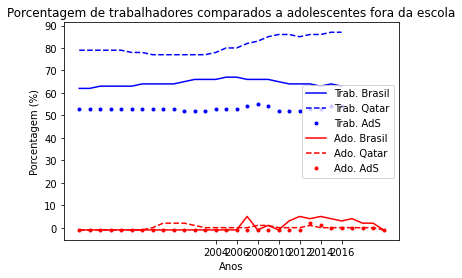

Covariância Brasil
-0.13122594918423344
Covariância Qatar
0.4531463786682499
Covariância AdS
0.1091440400544534
Correlação Brasil
-0.03485446912035962
Correlação Qatar
0.11405506745318336
Correlação AdS
0.1495722778410477


In [1]:
# APS1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

# ----------------------------------- #

df = pd.read_csv('csv/jobs.csv', sep=',', encoding='latin1', decimal='.')
df = df.drop(labels=['Series Name', 'Series Code', 'Country Code'], axis=1)
df = df.replace('(?<!\.)\.\.(?!\.)', -1, regex=True)

df2 = pd.read_csv('csv/adolescent.csv', sep=',', encoding='latin1', decimal='.')
df2 = df2.drop(labels=['Series Name', 'Series Code', 'Country Code'], axis=1)
df2 = df2.replace('(?<!\.)\.\.(?!\.)', -1, regex=True)

plt.style.use('default')
plt.figure()
fig, ax = plt.subplots()

# ----------------------------------- #

anosBrasil = df.iloc[27]
anosTop = df.iloc[179]
anosBottom = df.iloc[197]
r = 0
for areas in [anosBrasil, anosTop, anosBottom]:

    anos = []
    data = []
    i=0
    for ano in areas.index:
        if i >= 2:
            anos.append(int(float(ano[0:5])))
            data.append(int(float(areas[ano])))
        i+=1

    if r == 0:
        ax.plot(anos, data, 'b')
    elif r == 1:
        ax.plot(anos, data, 'b--')
    else:
        ax.plot(anos, data, 'b.')
    r+=1

# ----------------------------------- #

anosBrasil = df2.iloc[27]
anosTop = df2.iloc[179]
anosBottom = df2.iloc[197]
r=0
for areas in [anosBrasil, anosTop, anosBottom]:

    anos = []
    data = []
    i=0
    for ano in areas.index:
        if i >= 2:
            anos.append(int(float(ano[0:5])))
            data.append(int(float(areas[ano])))
        i+=1


    if r == 0:
        ax.plot(anos, data, 'r')
    elif r == 1:
        ax.plot(anos, data, 'r--')
    else:
        ax.plot(anos, data, 'r.')
    r+=1

# ----------------------------------- #

ax.legend(["Trab. Brasil", "Trab. Qatar", 'Trab. AdS', "Ado. Brasil", "Ado. Qatar", 'Ado. AdS'])
plt.xticks(range(2004, 2017, 2))
plt.yticks(range(0, 100, 10))
plt.title('Porcentagem de trabalhadores comparados a adolescentes fora da escola')
plt.xlabel('Anos')
plt.ylabel('Porcentagem (%)')
plt.show()

# ----------------------------------- #

def calcula_covariancia(df_trabalho, df_adol):
    lista_trabalho = list(df_trabalho)
    lista_adol = list(df_adol)
    lista_float_trab = []
    lista_float_adol = []
    del lista_trabalho[0]
    del lista_adol[0]
    for str in lista_trabalho:
        lista_float_trab.append(float(str))
    for str in lista_adol:
        lista_float_adol.append(float(str))
    serie_trab = pd.Series(lista_float_trab)
    serie_adol = pd.Series(lista_float_adol)
    covariancia = serie_trab.cov(serie_adol)
    print(covariancia)

print('Covariância Brasil')
calcula_covariancia(df.iloc[27], df2.iloc[27])
print('Covariância Qatar')
calcula_covariancia(df.iloc[179], df2.iloc[179])
print('Covariância AdS')
calcula_covariancia(df.iloc[197], df2.iloc[197])

# ----------------------------------- #

def calcula_correlacao(df_trabalho, df_adol):
    lista_trabalho = list(df_trabalho)
    lista_adol = list(df_adol)
    lista_float_trab = []
    lista_float_adol = []
    del lista_trabalho[0]
    del lista_adol[0]
    for str in lista_trabalho:
        lista_float_trab.append(float(str))
    for str in lista_adol:
        lista_float_adol.append(float(str))
    serie_trab = pd.Series(lista_float_trab)
    serie_adol = pd.Series(lista_float_adol)
    covariancia = serie_trab.corr(serie_adol)
    print(covariancia)

print('Correlação Brasil')
calcula_correlacao(df.iloc[27], df2.iloc[27])
print('Correlação Qatar')
calcula_correlacao(df.iloc[179], df2.iloc[179])
print('Correlação AdS')
calcula_correlacao(df.iloc[197], df2.iloc[197])
